# Data Pre-Processing for ArcGIS Input

#### Datasets and Sources:

Impact / Collisions DataSet: Toronto Police Open-Source Datasets

Intersection Congestion Data: City of Toronto Open-Source Datasets

TTC Schedule: City of Toronto Open-Source Datasets

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from bs4 import BeautifulSoup
%matplotlib inline 

intersection = pd.read_csv('Data/tmcs_2010_2019.csv')
collisions = pd.read_csv('Data/KSI.csv')
densities = pd.read_csv('Data/wellbeing_toronto.csv')

# Intersections

In [148]:
intersection.head(1)

,count_id,count_date,location_id,location,lng,lat,centreline_type,centreline_id,px,time_start,...,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
0,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 07:30:00-05:00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
intersection.drop(columns=['count_id', 'location_id', 'centreline_type', 'px', ], inplace=True)

In [150]:
intersection['lrg_vehicles'] = intersection['nb_bus_r'] \
+ intersection['nb_bus_l'] + intersection['nb_bus_t'] \
+ intersection['nb_truck_r'] + intersection['nb_truck_l'] \
+ intersection['nb_truck_t'] + intersection['sb_bus_r'] \
+ intersection['sb_bus_l'] + intersection['sb_bus_t'] \
+ intersection['sb_truck_r'] + intersection['sb_truck_l'] \
+ intersection['sb_truck_t'] + intersection['eb_bus_r'] \
+ intersection['eb_bus_l'] + intersection['eb_bus_t'] \
+ intersection['eb_truck_r'] + intersection['eb_truck_l'] \
+ intersection['eb_truck_t'] + intersection['wb_bus_r'] \
+ intersection['wb_bus_l'] + intersection['wb_bus_t'] \
+ intersection['wb_truck_r'] + intersection['wb_truck_l'] \
+ intersection['wb_truck_t']

In [151]:
intersection.drop(columns=['nb_bus_r', 'nb_bus_l', 'nb_bus_t', 'nb_truck_r', 'nb_truck_l', 'nb_truck_t', 'sb_bus_r', 'sb_bus_l', 'sb_bus_t', 'sb_truck_r','sb_truck_l', 'sb_truck_t', 'eb_bus_r', 'eb_bus_l', 'eb_bus_t', 'eb_truck_r', 'eb_truck_l', 'eb_truck_t', 'wb_bus_r', 'wb_bus_l', 'wb_bus_t', 'wb_truck_r', 'wb_truck_l', 'wb_truck_t'], inplace=True)

In [152]:
intersection['others'] = intersection['nx_peds'] \
+ intersection['sx_peds'] + intersection['ex_peds'] \
+ intersection['wx_peds'] + intersection['nx_bike'] \
+ intersection['sx_bike'] + intersection['ex_bike'] \
+ intersection['wx_bike'] + intersection['nx_other'] \
+ intersection['sx_other'] + intersection['ex_other'] \
+intersection['wx_other']

In [153]:
intersection.drop(columns=['nx_peds', 'sx_peds', 'ex_peds', 'wx_peds', 'nx_bike', 'sx_bike', 'ex_bike', 'wx_bike', 'nx_other', 'sx_other', 'ex_other', 'wx_other'], inplace=True)

In [154]:
intersection['cars'] = intersection['sb_cars_r'] \
+ intersection['sb_cars_t'] + intersection['sb_cars_l'] \
+ intersection['nb_cars_r'] + intersection['nb_cars_t'] \
+ intersection['nb_cars_l'] + intersection['wb_cars_r'] \
+ intersection['wb_cars_t'] + intersection['wb_cars_l'] \
+ intersection['eb_cars_r'] + intersection['eb_cars_t'] \
+ intersection['eb_cars_l']

In [155]:
intersection.drop(columns=['sb_cars_r', 'sb_cars_t', 'sb_cars_l', 'nb_cars_r', 'nb_cars_t', 'nb_cars_l', 'wb_cars_r', 'wb_cars_t', 'wb_cars_l', 'eb_cars_r', 'eb_cars_t', 'eb_cars_l'], inplace=True)

In [156]:
intersection.head()

,count_date,location,lng,lat,centreline_id,time_start,time_end,lrg_vehicles,others,cars
0,2010-01-12,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,13457294.0,2010-01-12 07:30:00-05:00,2010-01-12 07:45:00-05:00,3.0,13.0,91.0
1,2010-01-12,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,13457294.0,2010-01-12 07:45:00-05:00,2010-01-12 08:00:00-05:00,4.0,19.0,124.0
2,2010-01-12,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,13457294.0,2010-01-12 08:00:00-05:00,2010-01-12 08:15:00-05:00,5.0,21.0,108.0
3,2010-01-12,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,13457294.0,2010-01-12 08:15:00-05:00,2010-01-12 08:30:00-05:00,2.0,22.0,140.0
4,2010-01-12,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,13457294.0,2010-01-12 08:30:00-05:00,2010-01-12 08:45:00-05:00,6.0,34.0,134.0


In [157]:
intersection = intersection.groupby(['location','lng','lat', 'centreline_id'], \
as_index=False).agg({'lrg_vehicles':'sum', 'others':'sum', 'cars':'sum'})
intersection

,location,lng,lat,centreline_id,lrg_vehicles,others,cars
0,PORTLAND ST AT QUEEN ST W (PX 2088),-79.401414,43.647710,13467150.0,1117.0,11613.0,13118.0
1,# 1101 LESLIE ST AT 430M N OF EGLINTON AVE (PX...,-79.349127,43.722364,30112872.0,788.0,191.0,18957.0
2,# 111 PROGRESS AVE AT ATLANTIC PACKAGING (PX 2...,-79.272986,43.772966,13446743.0,1468.0,973.0,20493.0
3,# 1155 LESLIE ST AT BMW DEALERSHIP & 990M S OF...,-79.352746,43.728709,30004029.0,1679.0,61.0,15407.0
4,# 1315 NEILSON RD AT NEILSON RD & 175M N OF TA...,-79.219896,43.808089,12834067.0,922.0,2115.0,20680.0
...,...,...,...,...,...,...,...
3811,YONGE ST AT MOUNT PLEASANT CEMETERY ENTRANCE,-79.395342,43.692099,13459571.0,377.0,983.0,13418.0
3812,YONGE ST AT OLIVE AVE,-79.415286,43.778680,13446268.0,1803.0,5426.0,15336.0
3813,YONGE ST AT SOUDAN AVE & BERWICK AVE (PX 1375),-79.397852,43.704351,13457472.0,1464.0,10480.0,26079.0
3814,YONGE ST AT YORKVILLE AVE (PX 2377),-79.387503,43.671924,13463167.0,995.0,15976.0,23145.0


In [158]:
intersection.shape[0] == intersection['location'].nunique()

True

In [159]:
intersection['total_vehicles'] = intersection['cars'] + intersection['lrg_vehicles']

<AxesSubplot:xlabel='total_vehicles', ylabel='Count'>

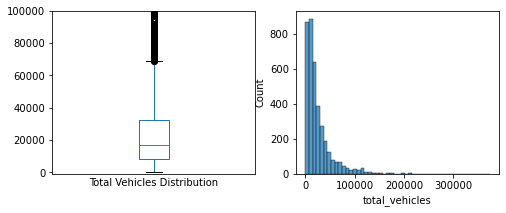

In [160]:
plt.figure(figsize=(8, 3))


plt.subplot(1, 2, 1) # row 1, col 2 index 1
intersection['total_vehicles'].plot(kind='box')
plt.ylim(-1000, 100000)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,             
    labelbottom=False)
plt.xlabel('Total Vehicles Distribution')

plt.subplot(1, 2, 2)
sb.histplot(intersection['total_vehicles'], bins=50)

In [161]:
intersection['total_vehicles'].quantile([0.33,0.66])

0.33    10472.85
0.66    24626.10
Name: total_vehicles, dtype: float64

In [162]:
intersection['traffic_density'] = pd.cut(intersection['total_vehicles'], bins=[0, 10472, 24626, float('Inf')], labels=['Medium', 'High', 'Extreme'])

In [163]:
intersection.to_csv('intersection_traffic.csv', sep=',')

# Collisions

In [164]:
collisions.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [165]:
collisions[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,43.656345,-79.452490
1,43.656345,-79.452490
2,43.801943,-79.199786
3,43.801943,-79.199786
4,43.734945,-79.256190
...,...,...
16855,43.714793,-79.238926
16856,43.740256,-79.232021
16857,43.740256,-79.232021
16858,43.740256,-79.232021


In [166]:
collisions.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId'],
      dtype='object')

In [167]:
collisions=collisions[['LATITUDE', 'LONGITUDE', 'DATE', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE']]
collisions.replace({'<Null>':np.nan}, inplace=True)
collisions.replace({'Yes':1}, inplace=True)

In [168]:
collisions.PEDESTRIAN.value_counts()

1.0    6827
Name: PEDESTRIAN, dtype: int64

In [169]:
collisions.head()

,LATITUDE,LONGITUDE,DATE,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE
0,43.656345,-79.452490,2006/03/11 05:00:00+00,1.0,NaN,1.0,NaN
1,43.656345,-79.452490,2006/03/11 05:00:00+00,1.0,NaN,1.0,NaN
2,43.801943,-79.199786,2006/03/11 05:00:00+00,NaN,NaN,1.0,1.0
3,43.801943,-79.199786,2006/03/11 05:00:00+00,NaN,NaN,1.0,1.0
4,43.734945,-79.256190,2006/03/12 05:00:00+00,1.0,NaN,1.0,NaN


In [170]:
collisions.to_csv('collisions.csv', sep=',')

# TTC Delays

In [171]:
delays21 = pd.concat(pd.read_excel('Data/ttc-streetcar-delay-data-2021.xlsx', sheet_name=None), ignore_index=True)
delays20 = pd.concat(pd.read_excel('Data/ttc-streetcar-delay-data-2020.xlsx', sheet_name=None), ignore_index=True)
delays19 = pd.concat(pd.read_excel('Data/ttc-streetcar-delay-data-2019.xlsx', sheet_name=None), ignore_index=True)

In [172]:
delays = pd.concat([delays21, delays20, delays19]).reset_index(drop=True)

In [173]:
delays.columns

Index(['Date', 'Line', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Bound', 'Vehicle', 'Report Date', 'Route', 'Delay', 'Gap',
       'Direction', 'Incident ID'],
      dtype='object')

In [174]:
delays = delays[['Location', 'Min Gap', 'Delay']]
delays.rename({'Min Gap':'Delay Min'}, inplace=True)

In [175]:
delays.fillna(0, inplace=True)
delays['Minute Delay'] = delays['Min Gap'] + delays['Delay']
delays = delays[['Location', 'Minute Delay']]
delays.sample(5)

,Location,Minute Delay
19313,Queen St E and Leslie St,8.0
22718,Leslie and Lakeshore,1.0
15944,BROADVIEW STN TO DUNDA,20.0
5613,DUNDAS WEST STATION,12.0
2628,RONCESVALLES AND QUEEN,14.0


In [176]:
delays.to_csv('TTC_Delays.csv', sep=',')